In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

## Show the results from BO, include parameter, observation, and best Ronchigrams

In [82]:
path = '../../../NionData/111121/2ndorder_attempt00_45mrad_250ms_standardize_removebuffer_scale_initPtCheck/'
abr_list = ["C10", "C12.x", "C12.y", "C21.x", "C21.y", "C23.x", "C23.y", "C30","C32.x", "C32.y", "C34.x", "C34.y"]
abr_lim = [2e-6, 1.5e-7, 1.5e-7, 3e-6, 3e-6, 1e-5, 1e-5, 3e-4, 2e-4, 2e-4, 1.5e-4, 1.5e-4]
act_list = [True, True, True, True, True, True, True, False, False, False, False, False]
ndim = sum(act_list)
abr_lim = [abr_lim[i] for i in range(len(abr_list)) if act_list[i]]
abr_list = [abr_list[i] for i in range(len(abr_list)) if act_list[i]]
idx_list = [0,1,2,3,4,5]
idx_list = [i for i in range(4)]
nrep = len(idx_list)

In [83]:
print(abr_list)
print(abr_lim)
print(nrep)

['C10', 'C12.x', 'C12.y', 'C21.x', 'C21.y', 'C23.x', 'C23.y']
[2e-06, 1.5e-07, 1.5e-07, 3e-06, 3e-06, 1e-05, 1e-05]
4


In [84]:
X.shape

(60, 3)

../../../NionData/111121/2ndorder_attempt00_45mrad_250ms_standardize_removebuffer_scale_initPtCheck/Ronchigram_00.npy 100
0.9142662957310677
../../../NionData/111121/2ndorder_attempt00_45mrad_250ms_standardize_removebuffer_scale_initPtCheck/Ronchigram_01.npy 100
0.8048783540725708
../../../NionData/111121/2ndorder_attempt00_45mrad_250ms_standardize_removebuffer_scale_initPtCheck/Ronchigram_02.npy 100
0.9065086022019386
../../../NionData/111121/2ndorder_attempt00_45mrad_250ms_standardize_removebuffer_scale_initPtCheck/Ronchigram_03.npy 100
0.8846458345651627
Average best seen: 0.8775747716426849


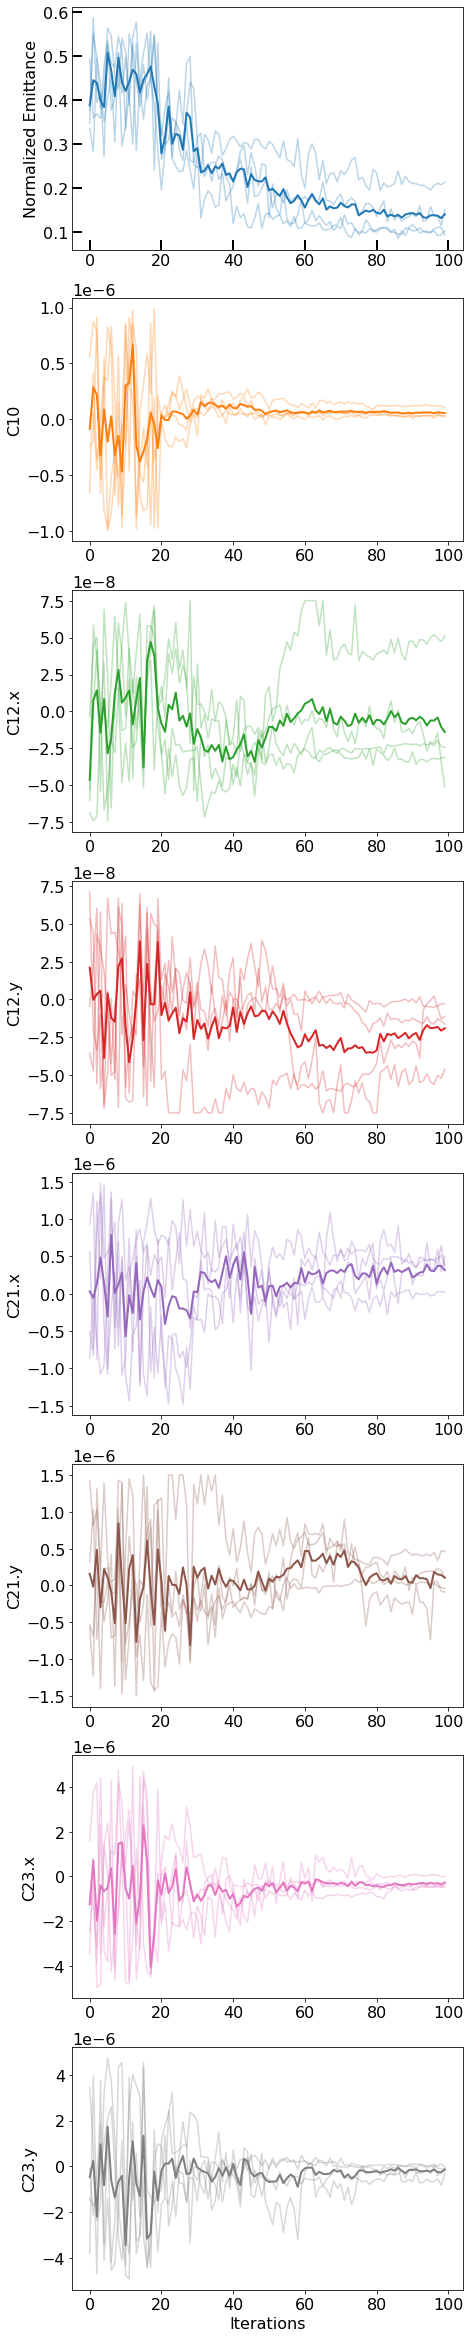

In [85]:
X = np.load(path + 'X_' + "{:02d}".format(0) + '.npy')
ndim = X.shape[1]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)

final_Y = 0

# Make the overall plot
fig, ax = plt.subplots(ncols = 1, nrows = ndim + 1, figsize = [7,ndim * 6])
ronch_init = np.zeros([128 * nrep, 128])
ronch_final = np.zeros([128 * nrep, 128])
average_list = [[0 for _ in range(X.shape[0])] for _ in range(ndim + 1)]

for irep in range(nrep):
    idx = idx_list[irep]
    Y = np.squeeze(np.load(path + 'Y_' + "{:02d}".format(idx) + '.npy'))
    X = np.load(path + 'X_' + "{:02d}".format(idx) + '.npy')
    Ronch = np.load(path + 'Ronchigram_' + "{:02d}".format(idx) + '.npy')
    print(path + 'Ronchigram_' + "{:02d}".format(idx) + '.npy', len(X))
    ax[0].plot(1-Y, c='C0', alpha = 0.3)
    average_list[0] += 1-Y
    for i in range(ndim):
        color = 'C' + str(i+1)
        ax[i+1].plot((X[:,i] - 0.5) * abr_lim[i], c = color, alpha = 0.3)
        average_list[i + 1] += (X[:,i] - 0.5) * abr_lim[i]
    best_idx = np.argmax(Y)
    print(Y[best_idx])
    final_Y += np.max(Y)
    ronch_init[128 * irep : 128 * (irep + 1), :] = Ronch[0]
    ronch_final[128 * irep : 128 * (irep + 1), :] = Ronch[best_idx - 19]
#     ronch_final[128 * irep : 128 * (irep + 1), :] = Ronch[-2]

ax[0].tick_params(which='major',direction = 'in', length = 10, width = 2)
ax[0].tick_params(which='minor',direction = 'in', length = 5)
ax[0].set_ylabel('Normalized Emittance', fontsize = 16)
ax[0].plot(average_list[0] / nrep, c = 'C0', linewidth = 2)

for i in range(ndim):
    color = 'C' + str(i+1)
    ax[i+1].set_ylabel(abr_list[i])
    ax[i+1].plot(average_list[i+1] / nrep, c = color, linewidth = 2)
    
ax[i+1].set_xlabel('Iterations',fontsize = 16)
print('Average best seen: ' + str(final_Y / nrep))

0.6813506782054901
(101, 128, 128)


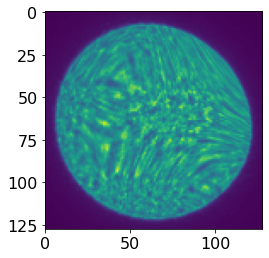

In [32]:
idx = 7
plt.imshow(Ronch[idx])
print(Y[idx + 19])
print(Ronch.shape)

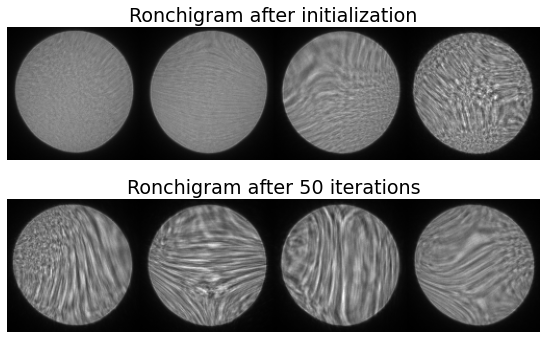

In [33]:
fig, ax = plt.subplots(ncols = 1, nrows = 2, figsize = [10,5])
ax[0].imshow(np.transpose(ronch_init), cmap = 'gray')
ax[0].axis('off')
ax[0].set_title('Ronchigram after initialization')
ax[1].imshow(np.transpose(ronch_final), cmap = 'gray')
ax[1].axis('off')
ax[1].set_title('Ronchigram after 50 iterations')
plt.tight_layout()

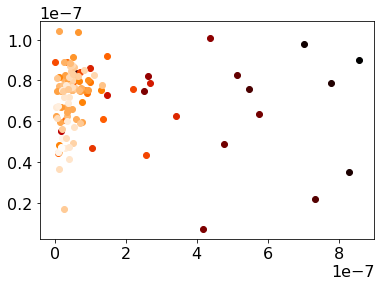

In [60]:
colors = cm.gist_heat((Y-np.amin(Y))/(np.amax(Y) - np.amin(Y)))
for y, c in zip(X, colors):
    plt.scatter(abs(y[0]-0.5)* abr_lim[0], np.sqrt((y[1]-0.5)**2 + (y[2]-0.5)**2) * abr_lim[1], color=c)
# plt.scatter(X[0], X[1], color = 1-Y)

In [72]:
# Compare different groups of results under the same folder
path = '../../../NionData/111121/2ndorder_attempt00_45mrad_250ms_standardize_removebuffer_scale_highLim/'
abr_list = ["C10", "C12.x", "C12.y", "C21.x", "C21.y", "C23.x", "C23.y", "C30","C32.x", "C32.y", "C34.x", "C34.y"]
abr_lim = [2e-6, 1.5e-7, 1.5e-7, 3e-6, 3e-6, 1e-5, 1e-5, 3e-4, 2e-4, 2e-4, 1.5e-4, 1.5e-4]
act_list = [True, True, True, True, True, True, True, False, False, False, False, False]
ndim = sum(act_list)
niter = 100
abr_lim = [abr_lim[i] for i in range(len(abr_list)) if act_list[i]]
abr_list = [abr_list[i] for i in range(len(abr_list)) if act_list[i]]
group_list = [[0,1,2,3,'10x aberration'],[6,7,8,9,'5x aberration'],
             [15,16,17,18,19,20,'Standard aberration limit']]

Average best seen: 0.8775747716426849


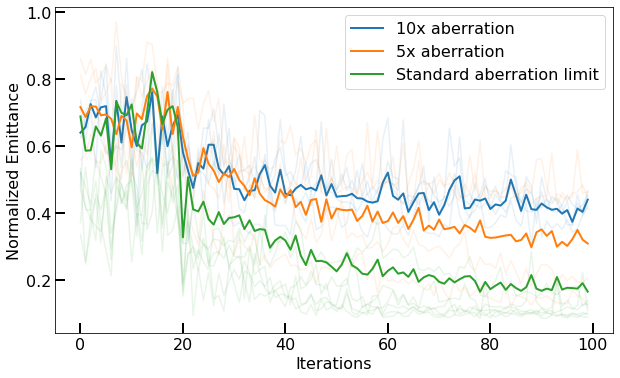

In [73]:
# Make the overall plot
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = [10, 6])
average_list = [[0 for _ in range(niter)] for _ in range(len(group_list))] # one average list for each group

for igroup in range(len(group_list)):
    label = group_list[igroup][-1]
    idx_list = group_list[igroup][:-1]
    for idx in idx_list:
        Y = np.squeeze(np.load(path + 'Y_' + "{:02d}".format(idx) + '.npy'))
        ax.plot(1-Y[:niter], c='C'+str(igroup), alpha = 0.1)
        average_list[igroup] += 1-Y[:niter]
    ax.plot(average_list[igroup] / nrep, c='C'+str(igroup), linewidth = 2, label = label)

ax.tick_params(which='major',direction = 'in', length = 10, width = 2)
ax.tick_params(which='minor',direction = 'in', length = 5)
ax.set_ylabel('Normalized Emittance', fontsize = 16)   
ax.set_xlabel('Iterations',fontsize = 16)
ax.legend(fontsize = 16)
print('Average best seen: ' + str(final_Y / nrep))

In [68]:
len(Y)

120